In [1]:
#push!(LOAD_PATH, "/lhome/pablom/work/other_projects/stats_ulysses/StarStats/")
#push!(LOAD_PATH, "/data/Ulysses/stats_ulysses/StarStats")
push!(LOAD_PATH, "/media/alina/20FCD8DF125DE0B0/work/work/StarStats/")
using StarStats

┌ Info: Precompiling StarStats [f5b11cd0-cc99-5366-b472-5a86f1fe5423]
└ @ Base loading.jl:1664


In [2]:
function path_constructor(strings::Vector{String})
    #DATA_FOLDER = "/lhome/pablom/work/other_projects/stats_ulysses_data/data/"
    DATA_FOLDER = "/media/alina/20FCD8DF125DE0B0/work/work/work_ulysses/data_stats_ulysses/data/"
    return DATA_FOLDER*"/LMC/LMC_$(strings[1])_$(strings[2])_$(strings[3]).track.gz"
end

path_constructor (generic function with 1 method)

In [3]:
using Printf
using BenchmarkTools
masses = [@sprintf("%.3f", x) for x in range(0.9,2.1,step=0.025)]
rotation = [@sprintf("%.2f", x) for x in range(0.0,0.9,step=0.1)]
overshoot = [@sprintf("%.2f", x) for x in range(0.5,4.5,step=0.5)]
grid = ModelDataGrid([rotation,masses,overshoot],
    [:rotation,:logM,:overshoot])
#@benchmark 
load_grid(grid,path_constructor); 

In [4]:
observable_names = [:Teff, :logL, :vrot]
observable_values = [4.51974, 4.289877, 70.7195]
observable_errors = [0.2, 0.2, 10]
# potentially parallelize this
grid_likelihood = ModelDataGridLikelihood(grid, observable_names, observable_values, observable_errors);

In [5]:
CI = credible_interval(grid_likelihood, :logM,0.68,1_000_000)

LoadError: MethodError: reducing over an empty collection is not allowed; consider supplying `init` to the reducer

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


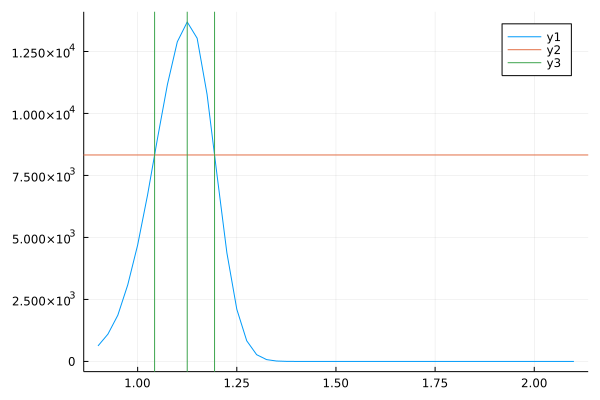

In [ ]:
using Plots
ml= marginalized_likelihood(grid_likelihood,[:logM])
plot(grid.input_values[2], ml)
hline!([CI[2]])
vline!(CI[1])

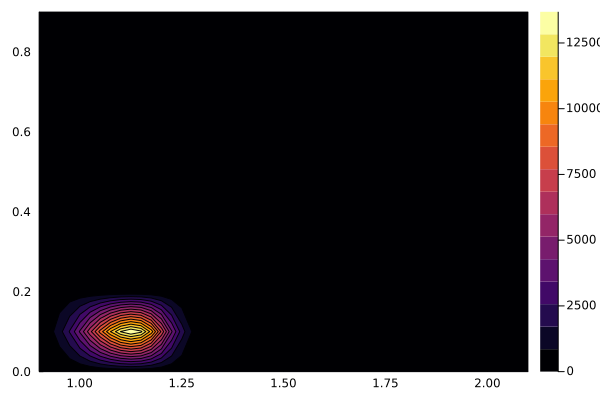

In [ ]:
using Plots

ml= marginalized_likelihood(grid_likelihood,[:logM, :rotation])
contour(grid.input_values[2], grid.input_values[1], ml', fill=true)

In [ ]:
# Add comments to package source code

# Turn MESA history into EEP
#   - read paper
# Interpolate EEP for single stars
# Incorporate interpolated data into likelihood computation
# Model comparisons